In [93]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [158]:
#实例化数据集，可视化数据集
X, y = make_blobs(n_samples=10, centers=2, random_state=0, cluster_std=0.6)


In [130]:
y

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [127]:
X

array([[1.06269622, 5.17635143],
       [0.52347363, 1.28983482],
       [1.54632313, 4.212973  ],
       [2.32158546, 1.09786826],
       [2.95171497, 0.7745687 ],
       [1.43289271, 4.37679234],
       [2.57392924, 0.45236465],
       [2.09680487, 3.7174206 ],
       [0.91433877, 4.55014643],
       [2.24310814, 0.38520622]])

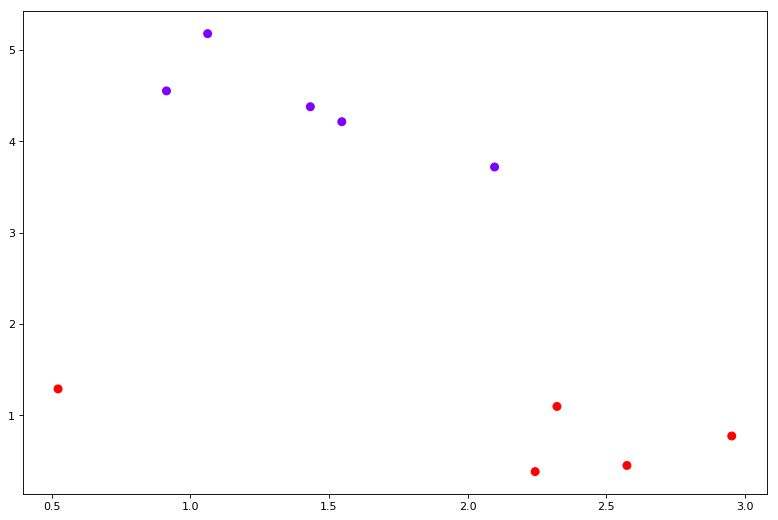

In [128]:
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="rainbow")
#plt.xticks([])    #取消横坐标轴上的标尺 
#plt.yticks([])    #取消纵坐标轴上的标尺 
plt.show()

In [17]:
seq_a = np.array([[1, 2, 3, 4, 5, 5, 2]])
valuecount_a = np.unique(seq_a)

In [16]:
lim_a.reshape([1,-1])

array([[1, 2, 3, 4, 5]])

In [120]:
# 演示如何生成 2-维平面上的 点
x_ar = np.array([[1, 2, 3]])
y_ar = np.array([[5, 7]])

x_ar1, y_ar1 = np.meshgrid(x_ar, y_ar)

xy_ar1 = np.vstack([y_ar1.ravel(), x_ar1.ravel()])

In [123]:
xy_ar1

array([[5, 5, 5, 7, 7, 7],
       [1, 2, 3, 1, 2, 3]])

In [110]:
x_ar1.ravel()

array([1, 1, 1, 2, 2, 2])

In [121]:
y_ar1

array([[5, 5, 5],
       [7, 7, 7]])

In [122]:
x_ar1

array([[1, 2, 3],
       [1, 2, 3]])

(0.1376003477777803, 5.423957300205297)

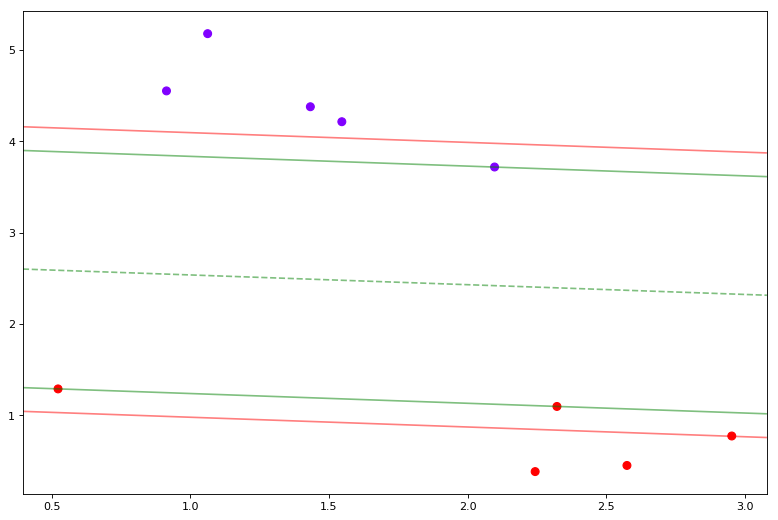

In [155]:
plt.figure(figsize=(12,8), dpi=80)
#定义画决策边界的函数
#首先要有散点图
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
xlim = ax.get_xlim()  # 取得横坐标的取值范围，即 最小值 和 最大值
ylim = ax.get_ylim()  #默认创建(0.0, 1.0)区间的横、纵坐标轴

#要画决策边界，必须要有网格
axisx =np.linspace(xlim[0], xlim[1], 10)   #在横坐标取值范围内生成 N 个值，得到一个1维 数组
axisy =np.linspace(ylim[0], ylim[1], 10)

#np.meshgrid 将特征向量 转化为 特征矩阵
axisy, axisx = np.meshgrid(axisy, axisx)   # axisx成为 30x30 的矩阵，axisy也是

#将两个特征向量广播，以便获取y.shape * x.shape 这么多个坐标点的 横、纵坐标
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T  # ravel:进行降维，2维 变成 1维
# xy就是 各个网格上的点的 坐标对

#建模，通过fit计算出对应的决策边界
clf = SVC(kernel="linear").fit(X, y)    #训练SVM模型

P = clf.decision_function(xy).reshape(axisx.shape)  # P是 xy二维数组代表的点，到决策边界的距离，P也是 10x10 的

#clf.decision_function就计算每个样本对应的到决策边界的距离
#然后，再这个距离转换为axisx的结构，10 x 10

if ax is None:
    ax = plt.gca()
#画决策边界和平行于决策边界的超平面
ax.contour(axisx, axisy, P,
           levels=[-1, 0, 1],
           colors="g",           
           alpha=0.5,                    #设置点的 透明度
           linestyles=["-", "--", "-"])
ax.contour(axisx, axisy, P,
           levels=[-1.2, 1.2],
           colors="r",           
           alpha=0.5,                    #设置点的 透明度
           linestyles=["-", "-"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [136]:
xy.shape

(100, 2)

In [142]:
P

array([[ 1.89878905,  1.44603972,  0.99329039,  0.54054106,  0.08779174,
        -0.36495759, -0.81770692, -1.27045625, -1.72320558, -2.17595491],
       [ 1.87427073,  1.4215214 ,  0.96877207,  0.51602274,  0.06327341,
        -0.38947592, -0.84222525, -1.29497457, -1.7477239 , -2.20047323],
       [ 1.8497524 ,  1.39700307,  0.94425375,  0.49150442,  0.03875509,
        -0.41399424, -0.86674357, -1.3194929 , -1.77224223, -2.22499156],
       [ 1.82523408,  1.37248475,  0.91973542,  0.46698609,  0.01423676,
        -0.43851257, -0.89126189, -1.34401122, -1.79676055, -2.24950988],
       [ 1.80071575,  1.34796643,  0.8952171 ,  0.44246777, -0.01028156,
        -0.46303089, -0.91578022, -1.36852955, -1.82127888, -2.2740282 ],
       [ 1.77619743,  1.3234481 ,  0.87069877,  0.41794944, -0.03479989,
        -0.48754921, -0.94029854, -1.39304787, -1.8457972 , -2.29854653],
       [ 1.75167911,  1.29892978,  0.84618045,  0.39343112, -0.05931821,
        -0.51206754, -0.96481687, -1.4175662 

In [145]:
axisx

array([[0.3968343 , 0.3968343 , 0.3968343 , 0.3968343 , 0.3968343 ,
        0.3968343 , 0.3968343 , 0.3968343 , 0.3968343 , 0.3968343 ],
       [0.69478096, 0.69478096, 0.69478096, 0.69478096, 0.69478096,
        0.69478096, 0.69478096, 0.69478096, 0.69478096, 0.69478096],
       [0.99272763, 0.99272763, 0.99272763, 0.99272763, 0.99272763,
        0.99272763, 0.99272763, 0.99272763, 0.99272763, 0.99272763],
       [1.2906743 , 1.2906743 , 1.2906743 , 1.2906743 , 1.2906743 ,
        1.2906743 , 1.2906743 , 1.2906743 , 1.2906743 , 1.2906743 ],
       [1.58862097, 1.58862097, 1.58862097, 1.58862097, 1.58862097,
        1.58862097, 1.58862097, 1.58862097, 1.58862097, 1.58862097],
       [1.88656763, 1.88656763, 1.88656763, 1.88656763, 1.88656763,
        1.88656763, 1.88656763, 1.88656763, 1.88656763, 1.88656763],
       [2.1845143 , 2.1845143 , 2.1845143 , 2.1845143 , 2.1845143 ,
        2.1845143 , 2.1845143 , 2.1845143 , 2.1845143 , 2.1845143 ],
       [2.48246097, 2.48246097, 2.4824609

In [146]:
axisy

array([[0.13760035, 0.72497334, 1.31234634, 1.89971933, 2.48709233,
        3.07446532, 3.66183832, 4.24921131, 4.83658431, 5.4239573 ],
       [0.13760035, 0.72497334, 1.31234634, 1.89971933, 2.48709233,
        3.07446532, 3.66183832, 4.24921131, 4.83658431, 5.4239573 ],
       [0.13760035, 0.72497334, 1.31234634, 1.89971933, 2.48709233,
        3.07446532, 3.66183832, 4.24921131, 4.83658431, 5.4239573 ],
       [0.13760035, 0.72497334, 1.31234634, 1.89971933, 2.48709233,
        3.07446532, 3.66183832, 4.24921131, 4.83658431, 5.4239573 ],
       [0.13760035, 0.72497334, 1.31234634, 1.89971933, 2.48709233,
        3.07446532, 3.66183832, 4.24921131, 4.83658431, 5.4239573 ],
       [0.13760035, 0.72497334, 1.31234634, 1.89971933, 2.48709233,
        3.07446532, 3.66183832, 4.24921131, 4.83658431, 5.4239573 ],
       [0.13760035, 0.72497334, 1.31234634, 1.89971933, 2.48709233,
        3.07446532, 3.66183832, 4.24921131, 4.83658431, 5.4239573 ],
       [0.13760035, 0.72497334, 1.3123463

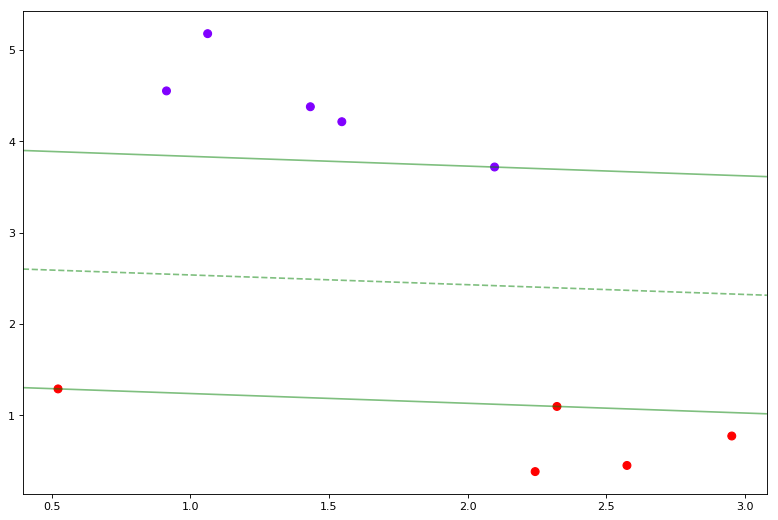

In [163]:
# 把绘边界包装成函数
def hjd_plot_svc_decision_function(clf_model, plot_ax=None):
    if plot_ax is None:
        plot_ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
    xlim = plot_ax.get_xlim()  # 取得横坐标的取值范围，即 最小值 和 最大值
    ylim = plot_ax.get_ylim()  #默认创建(0.0, 1.0)区间的横、纵坐标轴

    #要画决策边界，必须要有网格
    axisx =np.linspace(xlim[0], xlim[1], 20)   #在横坐标取值范围内生成 N 个值，得到一个1维 数组
    axisy =np.linspace(ylim[0], ylim[1], 20)

    #np.meshgrid 将特征向量 转化为 特征矩阵
    axisy, axisx = np.meshgrid(axisy, axisx)   # axisx成为 30x30 的矩阵，axisy也是

    #将两个特征向量广播，以便获取y.shape * x.shape 这么多个坐标点的 横、纵坐标
    xy = np.vstack([axisx.ravel(), axisy.ravel()]).T  # ravel:进行降维，2维 变成 1维
    # xy就是 各个网格上的点的 坐标对

    #建模，通过fit计算出对应的决策边界
    
    P = clf_model.decision_function(xy).reshape(axisx.shape)  # P是 xy二维数组代表的点，到决策边界的距离，P也是 10x10 的

    #clf.decision_function就计算每个样本对应的到决策边界的距离
    #然后，再这个距离转换为axisx的结构，10 x 10

    #画决策边界和平行于决策边界的超平面
    plot_ax.contour(axisx, axisy, P,
               levels=[-1, 0, 1],
               colors="g",           
               alpha=0.5,                    #设置点的 透明度
               linestyles=["-", "--", "-"])
    #plot_ax.contour(axisx, axisy, P,
    #           levels=[-1.2, 1.2],
    #           colors="r",           
    #           alpha=0.5,                    #设置点的 透明度
    #           linestyles=["-", "-"])
    plot_ax.set_xlim(xlim)
    plot_ax.set_ylim(ylim)

#__main__
plt.figure(figsize=(12,8), dpi=80)
#定义画决策边界的函数
#首先要有散点图
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="rainbow")
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel="linear").fit(X, y)    #训练SVM模型
hjd_plot_svc_decision_function(clf)


In [175]:
xy_test = np.array([[1, 1],
                   [5, 6]])
P_test = clf.decision_function(xy_test)

In [176]:
P_test

array([ 1.18441303, -2.99876984])